## Python Google Trends API

* https://towardsdatascience.com/google-trends-api-for-python-a84bc25db88f
* https://pypi.org/project/pytrends/
* https://github.com/GeneralMills/pytrends#installation
* https://www.honchosearch.com/blog/seo/how-to-use-python-pytrends-to-automate-google-trends-data/
* https://www.datacamp.com/community/tutorials



In [34]:
#!python3.8 -m pip install pytrends

In [1]:
import pandas as pd                        

In [2]:
from pytrends.request import TrendReq

In [3]:
# Get Dataframe with desired keyoword trend search
pytrend = TrendReq()

In [9]:
kw_list=['energia solar','placas solares'] #, 'ahorro corriente', 'ahorro energia', 'energia fotovoltaica', 'energia solar fotovoltaica', 'placa energia solar']

In [16]:
pytrend.build_payload(kw_list, geo='ES', timeframe='today 1-y')
#keyword":"energia solar","geo":"ES","time":"today 1-y"

ResponseError: The request failed: Google returned a response with code 400.

In [15]:
# Interest by Region
df = pytrend.interest_by_region()
#df = df[df['energia solar'] != 0]
#print(df.sort_values(by='energia solar', ascending=False))

df.shape

KeyError: 'request'

## Building Payload & Collecting Data of Keywords

In [19]:
def gtrends_overtime(full_list, key_ref, save_name="", directory="", 
                     category=0, time='all', loc=''):
    #iterate every 4 item in list plus a keyword reference as the relative comparison
    i = 0
    while i < len(kw_list):
        l = kw_list[i:(i+4)]
        l.append(key_ref)
        pytrend.build_payload(l, cat=category, timeframe=time, geo=loc, gprop='')
        df_time = pytrend.interest_over_time()
        df_time.reset_index(inplace=True)
        df_time_name = "gtrends_overtime"+str(save_name)+str((i+4)//4)+".csv"
        df_time.to_csv(directory+df_time_name, index = False)
        i += 5

In [14]:
# Global Variables
#kw_list = ['placa solar','ahorro energia solar','instalador placas solares'] # a file for each cluster of 4 kw
directory = "/Users/joan/Workspace/python/py-trends-api/"

In [209]:
gtrends_overtime(kw_list, 'energia solar', "_worldwide_", directory,
                 category=71, time='all', loc='')

In [21]:
gtrends_overtime(kw_list, 'ahorro energia', "_ES_", directory,
                 category=71, time='all', loc='ES')

In [211]:
gtrends_overtime(kw_list, 'energia solar', "_ID_", directory,
                 category=71, time='all', loc='ID')

In [12]:
def gtrends_region(kw_list, key_ref, save_name="", directory="",
                   category=0, time='all', loc='', res='COUNTRY'):
    #iterate every 4 item in list plus a keyword reference as the relative comparison
    i = 0
    while i < len(kw_list):
        l = kw_list[i:(i+4)]
        l.append(key_ref)
        pytrend.build_payload(l, cat=category, timeframe=time, geo=loc, gprop='')
        # resolution can be set to 'REGION' when loc is set to specific country, e.g. 'US'
        df_region = pytrend.interest_by_region(resolution=res, inc_low_vol=True, inc_geo_code=False)
        df_region.reset_index(inplace=True)
        df_region_name = "gtrends_region"+str(save_name)+str((i+4)//4)+".csv"
        df_region.to_csv(df_region_name, index = False)
        i += 4

In [213]:
gtrends_region(kw_list, 'energia solar', "_worldwide_", directory,
               category=71, time='all', loc='', res='COUNTRY')

In [22]:
gtrends_region(kw_list, 'ahorro energia', "_ES_", directory,
               category=71, time='today 1-year', loc='ES', res='REGION')

ResponseError: The request failed: Google returned a response with code 400.

## Integration, Normalization & Cleaning Data

In [11]:
def combine_wbase(directory, base_name, n_file, filename):
    df1 = pd.read_csv(directory+base_name+str(1)+".csv")
    for i in range(n_file-1):
        df2 = pd.read_csv(directory+base_name+str(i+2)+".csv")
        df1 = pd.concat([df1, df2], axis=1, sort=False)
    df_name = filename
    # Saving the merged file or you can simply return the dataframe
    df1.to_csv(df_name, index = False)
    #return df1

In [12]:
'''Test just 1 keyword and store into CSV, 
month by month to get hourly to avoid timeouts'''

geo = 'ES'
kw_list = ['energia solar']
solar_df = pytrend.get_historical_interest(kw_list, year_start=2020, month_start=1, day_start=1, hour_start=0, year_end=2020, month_end=2, day_end=28, hour_end=23, cat=0, geo=geo, gprop='', sleep=0)
solar_df.to_csv(directory + 'solar_df_historical.csv', index = False)
solar_df

,energia solar,isPartial
date,,
2020-01-01 00:00:00,14,False
2020-01-01 01:00:00,13,False
2020-01-01 02:00:00,0,False
2020-01-01 03:00:00,0,False
2020-01-01 04:00:00,0,False
...,...,...
2020-02-25 20:00:00,0,False
2020-02-25 21:00:00,0,False
2020-02-25 22:00:00,0,False


### Get Date column from keys

In [14]:
# Convert date index to new column date
solar_df.reset_index(inplace=True)
solar_df

,index,date,energia solar,isPartial
0,0,2020-01-01 00:00:00,14,False
1,1,2020-01-01 01:00:00,13,False
2,2,2020-01-01 02:00:00,0,False
3,3,2020-01-01 03:00:00,0,False
4,4,2020-01-01 04:00:00,0,False
...,...,...,...,...
1347,1347,2020-02-25 20:00:00,0,False
1348,1348,2020-02-25 21:00:00,0,False
1349,1349,2020-02-25 22:00:00,0,False
1350,1350,2020-02-25 23:00:00,0,False


In [15]:
solar_df.dtypes

index                     int64
date             datetime64[ns]
energia solar             int64
isPartial                  bool
dtype: object

In [16]:
# combine_wbase if more than 1 file
solar_df = pd.read_csv(directory+'gtrends_overtime_ES_1'+".csv")
solar_df

,date,placa solar,ahorro energia solar,instalador placas solares,energia solar,isPartial
0,2004-01-01,0,0,0,0,False
1,2004-02-01,0,0,0,0,False
2,2004-03-01,0,0,0,0,False
3,2004-04-01,0,0,0,0,False
4,2004-05-01,0,0,0,0,False
...,...,...,...,...,...,...
204,2021-01-01,0,0,0,8,False
205,2021-02-01,0,0,0,0,False
206,2021-03-01,8,0,0,0,False
207,2021-04-01,9,0,0,0,False


In [17]:
# Tidy up IsPartial column for data overtime, eliminates the rows with isPartial == true
# and then drop the column isPartial, when all values are false
def partial(df, n_file):
    for i in range(n_file-1):
        df = df.drop(columns="isPartial."+str(i+1)+"")
    if df.isPartial.tail(1).bool() == True:
        df = df.drop(df.isPartial.tail(1).index, axis=0)
    df = df.drop(columns="isPartial")
    return df

In [18]:
combined = partial(combined,25) # number of files to check

NameError: name 'combined' is not defined

In [19]:
solar_df = partial(solar_df,1)
solar_df

,date,placa solar,ahorro energia solar,instalador placas solares,energia solar
0,2004-01-01,0,0,0,0
1,2004-02-01,0,0,0,0
2,2004-03-01,0,0,0,0
3,2004-04-01,0,0,0,0
4,2004-05-01,0,0,0,0
...,...,...,...,...,...
203,2020-12-01,0,0,0,0
204,2021-01-01,0,0,0,8
205,2021-02-01,0,0,0,0
206,2021-03-01,8,0,0,0


In [20]:
# normalisation formula => new_value[column][n] = old_value[column][n] * (df[key_ref][n]/df[key_ref+"."+str(i)+""][n])
def normalise(df, n_file, key_ref, col='date'):
    li = []
    # Checking the relative popularity between comparisons
    for i in range(n_file-1):    
        df = df.drop(columns=col+"."+str(i+1)+"")
        # Appending the list if relative popularity of the keyword reference is different
        if df[key_ref+"."+str(i+1)+""][0] == df[key_ref][0]:
            pass
        else:
            li.append(i+1)
    
    # Normalizing relative popularity when the relative popularity of the keyword reference is different         
    for l in li:
        k = df.columns.get_loc(key_ref+"."+str(l)+"")
        for n in range(len(df.index)):
            # Computing relative popularity by normalizing according to the reference
            if df.iloc[n,(k)] > 0:
                for m in range(5):
                    df.iloc[n,(k-4+m)] = (df.iloc[n,(k-4+m)] * (df[key_ref][n]/df.iloc[n,(k)]))
            else:
                for m in range(5):
                    df.iloc[n,(k-4+m)] = (df.iloc[n,(k-4+m)] * (df[key_ref][n]/0.01))
    return df

In [21]:
solar_df = normalise(solar_df, n_file=1, key_ref="energia solar", col='date')
solar_df

,date,placa solar,ahorro energia solar,instalador placas solares,energia solar
0,2004-01-01,0,0,0,0
1,2004-02-01,0,0,0,0
2,2004-03-01,0,0,0,0
3,2004-04-01,0,0,0,0
4,2004-05-01,0,0,0,0
...,...,...,...,...,...
203,2020-12-01,0,0,0,0
204,2021-01-01,0,0,0,8
205,2021-02-01,0,0,0,0
206,2021-03-01,8,0,0,0


In [22]:
# Tidy up to melt keywords into a single 'Keyword column' plus a normalised 'interest' column
# TODO pending to try out
def tidy(df, n_file, key_ref, kw_file, col='date'):
    for i in range(n_file-1):    
        df = df.drop(columns=key_ref+"."+str(i+1)+"")
    df=pd.melt(df,id_vars=[col],var_name='Keywords', value_name='interest')
    df = df.merge(kw_file, on="Keywords")
    return df
  

In [23]:
# TODO pending to try out
solar_df = tidy(solar_df, 1, "energia solar", kw_file, col='date')
solar_df

NameError: name 'kw_file' is not defined

In [24]:
solar_df.to_csv(directory + "gtrends_solar_overtime_all.csv", index = False)
solar_df

,date,placa solar,ahorro energia solar,instalador placas solares,energia solar
0,2004-01-01,0,0,0,0
1,2004-02-01,0,0,0,0
2,2004-03-01,0,0,0,0
3,2004-04-01,0,0,0,0
4,2004-05-01,0,0,0,0
...,...,...,...,...,...
203,2020-12-01,0,0,0,0
204,2021-01-01,0,0,0,8
205,2021-02-01,0,0,0,0
206,2021-03-01,8,0,0,0


In [25]:
solar_df.dtypes


date                         object
placa solar                   int64
ahorro energia solar          int64
instalador placas solares     int64
energia solar                 int64
dtype: object

In [28]:
solar_df['date'] = pd.to_datetime(solar_df['date'], format='%Y-%m-%d') #T%H:%M:%SZ')
solar_df

,date,placa solar,ahorro energia solar,instalador placas solares,energia solar
0,2004-01-01,0,0,0,0
1,2004-02-01,0,0,0,0
2,2004-03-01,0,0,0,0
3,2004-04-01,0,0,0,0
4,2004-05-01,0,0,0,0
...,...,...,...,...,...
203,2020-12-01,0,0,0,0
204,2021-01-01,0,0,0,8
205,2021-02-01,0,0,0,0
206,2021-03-01,8,0,0,0


In [29]:
solar_df['year'], solar_df['month'], solar_df['day'], solar_df['hour'] = solar_df['date'].apply(lambda x: x.year), solar_df['date'].apply(lambda x: x.month), solar_df['date'].apply(lambda x: x.day), solar_df['date'].apply(lambda x: x.hour)
solar_df

,date,placa solar,ahorro energia solar,instalador placas solares,energia solar,year,month,day,hour
0,2004-01-01,0,0,0,0,2004,1,1,0
1,2004-02-01,0,0,0,0,2004,2,1,0
2,2004-03-01,0,0,0,0,2004,3,1,0
3,2004-04-01,0,0,0,0,2004,4,1,0
4,2004-05-01,0,0,0,0,2004,5,1,0
...,...,...,...,...,...,...,...,...,...
203,2020-12-01,0,0,0,0,2020,12,1,0
204,2021-01-01,0,0,0,8,2021,1,1,0
205,2021-02-01,0,0,0,0,2021,2,1,0
206,2021-03-01,8,0,0,0,2021,3,1,0


In [30]:
# copy keyword column name 'energia solar' values into a new column 'interest'
# instead of run tidy function

In [31]:
keyword = 'energia solar'
solar_df['googleInterest'] = solar_df[keyword]
solar_df

,date,placa solar,ahorro energia solar,instalador placas solares,energia solar,year,month,day,hour,googleInterest
0,2004-01-01,0,0,0,0,2004,1,1,0,0
1,2004-02-01,0,0,0,0,2004,2,1,0,0
2,2004-03-01,0,0,0,0,2004,3,1,0,0
3,2004-04-01,0,0,0,0,2004,4,1,0,0
4,2004-05-01,0,0,0,0,2004,5,1,0,0
...,...,...,...,...,...,...,...,...,...,...
203,2020-12-01,0,0,0,0,2020,12,1,0,0
204,2021-01-01,0,0,0,8,2021,1,1,0,8
205,2021-02-01,0,0,0,0,2021,2,1,0,0
206,2021-03-01,8,0,0,0,2021,3,1,0,0


In [32]:
# Transpose column name = 'energia solar' into a column value in a new column 'keyword'
# instead of run tidy function

In [33]:
solar_df['keyword'] = keyword
solar_df = solar_df.drop(columns=keyword)
solar_df

,date,placa solar,ahorro energia solar,instalador placas solares,year,month,day,hour,googleInterest,keyword
0,2004-01-01,0,0,0,2004,1,1,0,0,energia solar
1,2004-02-01,0,0,0,2004,2,1,0,0,energia solar
2,2004-03-01,0,0,0,2004,3,1,0,0,energia solar
3,2004-04-01,0,0,0,2004,4,1,0,0,energia solar
4,2004-05-01,0,0,0,2004,5,1,0,0,energia solar
...,...,...,...,...,...,...,...,...,...,...
203,2020-12-01,0,0,0,2020,12,1,0,0,energia solar
204,2021-01-01,0,0,0,2021,1,1,0,8,energia solar
205,2021-02-01,0,0,0,2021,2,1,0,0,energia solar
206,2021-03-01,8,0,0,2021,3,1,0,0,energia solar


In [ ]:
# TODO --> add location columns

In [129]:
# using geo global var
solar_df['location'] = geo
solar_df

,date,year,month,day,hour,googleInterest,keyword,location
0,2021-05-01 00:00:00,2021,5,1,0,17,energia solar,ES
1,2021-05-01 01:00:00,2021,5,1,1,10,energia solar,ES
2,2021-05-01 02:00:00,2021,5,1,2,28,energia solar,ES
3,2021-05-01 03:00:00,2021,5,1,3,37,energia solar,ES
4,2021-05-01 04:00:00,2021,5,1,4,34,energia solar,ES
...,...,...,...,...,...,...,...,...
550,2021-05-30 19:00:00,2021,5,30,19,36,energia solar,ES
551,2021-05-30 20:00:00,2021,5,30,20,27,energia solar,ES
552,2021-05-30 21:00:00,2021,5,30,21,31,energia solar,ES
553,2021-05-30 22:00:00,2021,5,30,22,32,energia solar,ES


In [ ]:
# TODO --> visualize data, are there peaks to be detected?

In [ ]:
# TODO --> add isTrendPeak column with the top peaks market over threashold of 25%

In [ ]:
# TODO --> add social media context values just like number of related tweets, number of related facebook  new records

In [23]:
# Interest by Region
pytrend.build_payload(kw_list=['energia solar'], geo='ES', timeframe='all')

df = pytrend.interest_by_region(resolution='CITY', inc_low_vol=True, inc_geo_code=False)
df.sort_values(by=['energia solar'], ascending=False)
print(df.head(25))


                     energia solar
geoName                           
Andalusia                       66
Aragon                          59
Asturias                        41
Balearic Islands                61
Basque Country                  45
Canary Islands                  55
Cantabria                       44
Castile and León                52
Castile-La Mancha               60
Catalonia                       61
Ceuta                            0
Community of Madrid            100
Extremadura                     61
Galicia                         48
La Rioja                        41
Melilla                          0
Navarre                         33
Region of Murcia                71
Valencian Community             66


In [182]:
# Create payload and capture API tokens. Only needed for interest_over_time(), interest_by_region() & related_queries()
pytrend.build_payload(kw_list=['energia solar'], geo='ES', timeframe='all')
#pytrend.build_payload(kw_list=['energia solar', 'solar energy'])


In [183]:
# Interest Over Time
interest_over_time_df = pytrend.interest_over_time()
interest_over_time_df.shape

# need dates into column date
#interest_over_time_df['Date'] = interest_over_time_df.keys

# need year + month + day columns as well

# need interest over time for each region or city level and then merge all of them together

interest_over_time_df


,energia solar,isPartial
date,,
2004-01-01,81,False
2004-02-01,84,False
2004-03-01,77,False
2004-04-01,60,False
2004-05-01,75,False
...,...,...
2021-01-01,7,False
2021-02-01,10,False
2021-03-01,9,False


In [12]:

# Interest by Region
interest_by_region_df = pytrend.interest_by_region()
print(interest_by_region_df.head())


                energia solar  solar energy
geoName                                    
Afghanistan                 0             0
Albania                     0             0
Algeria                     0           100
American Samoa              0             0
Andorra                     0             0


In [13]:

# Related Queries, returns a dictionary of dataframes
related_queries_dict = pytrend.related_queries()
print(related_queries_dict)


{'energia solar': {'top':                           query  value
0                    la energia    100
1              la energia solar     95
2                        eolica     46
3                energia eolica     44
4          energia fotovoltaica     32
5                  fotovoltaica     32
6          que es energia solar     32
7    energia solar fotovoltaica     32
8                que es energia     31
9             que es la energia     27
10      que es la energia solar     26
11                energía solar     25
12                sistema solar     18
13        sistema energia solar     18
14          placa energia solar     18
15                  placa solar     18
16              energia nuclear     16
17            energia electrica     16
18        o que é energia solar     16
19         energia solar brasil     15
20           energia hidraulica     15
21          curso energia solar     15
22       tipos de energia solar     14
23             tipos de energia     14

In [14]:

# Get Google Hot Trends data
trending_searches_df = pytrend.trending_searches()
print(trending_searches_df.head())


                   0
0         This Is Us
1                GME
2               NCIS
3  San Jose shooting
4        John Warner


In [15]:

# Get Google Hot Trends data
today_searches_df = pytrend.today_searches()
print(today_searches_df.head())


0            GME
1     This Is Us
2           NCIS
3       San Jose
4    John Warner
Name: query, dtype: object


In [18]:

# Get Google Top Charts
top_charts_df = pytrend.top_charts(2020, hl='en-US', tz=300, geo='GLOBAL')
print(top_charts_df.head())


              title exploreQuery
0       Coronavirus             
1  Election results             
2       Kobe Bryant             
3              Zoom             
4               IPL             


In [133]:

# Get Google Keyword Suggestions
suggestions_dict = pytrend.suggestions(keyword='solar energy')
print(suggestions_dict)






[{'mid': '/m/06xbd', 'title': 'Solar energy', 'type': 'Topic'}, {'mid': '/m/05t0ydv', 'title': 'Solar power', 'type': 'Topic'}, {'mid': '/m/025c01', 'title': 'Solar thermal energy', 'type': 'Topic'}, {'mid': '/m/011p_x8b', 'title': 'Solar Energy', 'type': 'Journal'}]


In [257]:
# Get historical interest hourly
historical_int_df = pytrend.get_historical_interest(kw_list, year_start=2020, month_start=1, day_start=1, hour_start=0, year_end=2020, month_end=2, day_end=1, hour_end=23, cat=0, geo='', gprop='', sleep=0)
historical_int_df.shape

(772, 4)

In [164]:
historical_int_df.head()

,energia solar,isPartial
date,,
2020-01-01 00:00:00,14,False
2020-01-01 01:00:00,13,False
2020-01-01 02:00:00,0,False
2020-01-01 03:00:00,0,False
2020-01-01 04:00:00,0,False


In [136]:
import matplotlib.pyplot as plt

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


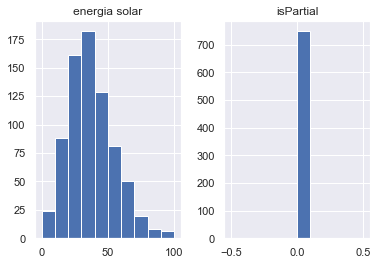

In [137]:
viz = historical_int_df[['energia solar','isPartial']]
viz.hist()
plt.show()

In [159]:
historical_int_df.describe()

,energia solar,Keyword
count,749.000000,749.000000
mean,36.997330,36.997330
std,17.697019,17.697019
min,0.000000,0.000000
25%,24.000000,24.000000
50%,35.000000,35.000000
75%,47.000000,47.000000
max,100.000000,100.000000


In [166]:
historical_int_df.columns

Index(['energia solar', 'isPartial', 'Date'], dtype='object')

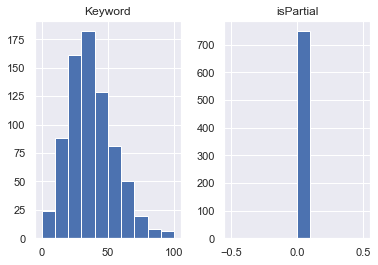

In [154]:
trend_df = historical_int_df[['Keyword','Date','isPartial']]
trend_df.hist()
plt.show()

TypeError: float() argument must be a string or a number, not 'method'

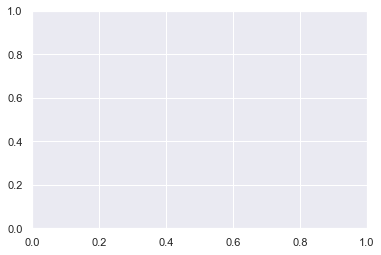

In [155]:
plt.scatter(trend_df.Keyword, trend_df.Date,  color='blue')
plt.xlabel("Keyword")
plt.ylabel("Date")
plt.show()

In [72]:
pytrend.trending_searches()

,0
0,San Jose shooting
1,Dalton Gomez
2,Knicks
3,AMC stock
4,Miles Teller
5,This Is Us
6,Sixers
7,Kevin Clark
8,Utah Jazz
9,Eric Carle


Text(0, 0.5, 'Total Searches')

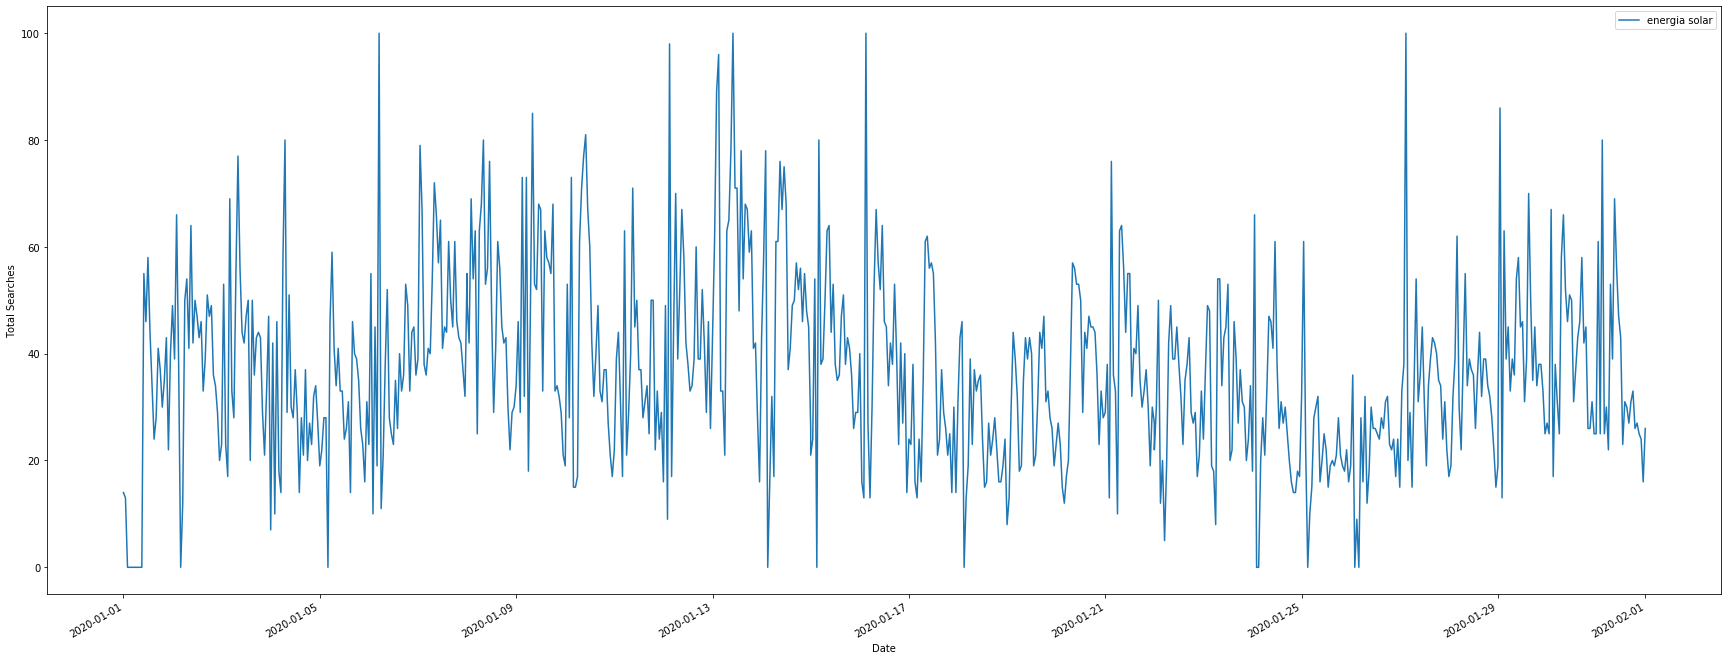

In [76]:
historical_int_df.plot(figsize=(30, 12))
plt.xlabel('Date')
plt.ylabel('Total Searches')

In [77]:
# Interest by Region
df = pytrend.interest_by_region()
df.head(10)

,energia solar
geoName,
Andalusia,83
Aragon,82
Asturias,52
Balearic Islands,99
Basque Country,60
Canary Islands,72
Cantabria,62
Castile and León,71
Castile-La Mancha,92


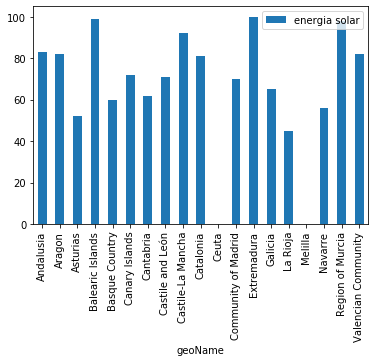

In [82]:
df.reset_index().plot(x='geoName', y='energia solar', kind ='bar')

In [83]:
# Related Queries, returns a dictionary of dataframes
related_queries = pytrend.related_queries() # to kw = energia solar
related_queries.values()

dict_values([{'top':                                    query  value
0                       la energia solar    100
1             energia solar fotovoltaica     69
2                           fotovoltaica     69
3                   energia fotovoltaica     67
4                  energia solar termica     45
5                   energia solar españa     35
6                          energía solar     32
7                         energia eolica     26
8                         placas solares     23
9                energia solar en españa     21
10                ventajas energia solar     21
11                     que es la energia     18
12               que es la energia solar     17
13                     energia renovable     15
14                           placa solar     12
15          ventajas de la energia solar     12
16                tipos de energia solar     11
17                     kit energia solar     11
18                   energias renovables     10
19  energia solar v

In [84]:
# Related topics to kw = energia solar
related_topic = pytrend.related_topics()
related_topic.values()

dict_values([{'rising':     value formattedValue                                               link  \
0   39200       Breakout  /trends/explore?q=/m/025rzqx&date=today+5-y&ge...   
1   28300       Breakout  /trends/explore?q=/g/11f01qnyj3&date=today+5-y...   
2   28000       Breakout  /trends/explore?q=/m/07m61p&date=today+5-y&geo=ES   
3   27650       Breakout  /trends/explore?q=/g/120ylmh4&date=today+5-y&g...   
4   16700       Breakout  /trends/explore?q=/g/124sv79pm&date=today+5-y&...   
5    5400       Breakout   /trends/explore?q=/m/07l5g&date=today+5-y&geo=ES   
6    1300        +1,300%  /trends/explore?q=/g/1q6h_pv53&date=today+5-y&...   
7     900          +900%  /trends/explore?q=/g/11jfdcrvqd&date=today+5-y...   
8     800          +800%  /trends/explore?q=/g/11b5v4w873&date=today+5-y...   
9     750          +750%  /trends/explore?q=/m/08x83f&date=today+5-y&geo=ES   
10    750          +750%  /trends/explore?q=/m/025szts&date=today+5-y&ge...   
11    550          +550%   /

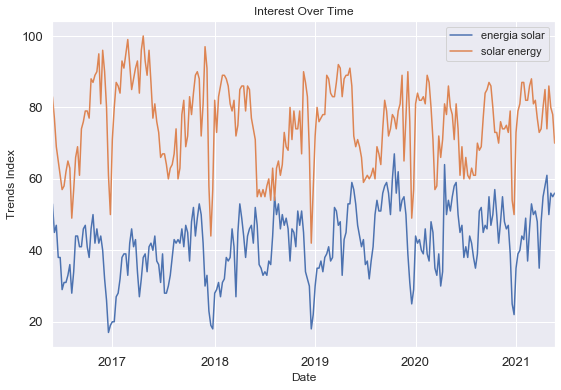

In [91]:
# Let's draw 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
dx = interest_over_time_df.plot.line(figsize = (9,6), title = "Interest Over Time")
dx.set_xlabel('Date')
dx.set_ylabel('Trends Index')
dx.tick_params(axis='both', which='major', labelsize=13)

## Tracking rising keywords

In [93]:
pytrend.build_payload(kw_list=['foundation', 'eyeliner', 'concealer', 'lipstick'], geo = 'US', timeframe = 'today 3-m', cat = 44)
related_queries= pytrend.related_queries()
dg = related_queries.get('lipstick').get('rising') 
dg # in percentage of increasing tendency
#dg.describe()

,value
count,25.000000
mean,4210.800000
std,1907.048155
min,70.000000
25%,2200.000000
50%,4400.000000
75%,4500.000000
max,8800.000000


# Google Season Peaks detector

* https://colab.research.google.com/drive/1VEZ1FCenWdjYPPUjmqg6y8ayfITtFlG1?usp=sharing

In [2]:
#!pip install pytrends --quiet
!python3.8 -m pip install peakutils

  Using cached PeakUtils-1.3.3-py3-none-any.whl (7.7 kB)
You should consider upgrading via the '/opt/anaconda3/bin/python3.8 -m pip install --upgrade pip' command.


In [4]:
'''
IMPORTS
'''
import peakutils
from collections import Counter

import pandas as pd
import numpy as np
import scipy.stats as sp
import matplotlib.pyplot as plt

In [5]:
'''
GLOBAL VARS AND CONSTANTS
'''
MONTHS = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}


In [6]:
def get_peaks(kw, geo='ES', timeframe='today 5-y'):
    """
    A function to get the trend for a keyword and to spot when peaks happen.

    Notes
    -----
    This func uses pytrends, an unofficial API for Google Trends

    .. _Pytrends Repo/Docs
        https://github.com/GeneralMills/pytrends

    Parameters
    ----------
    kw : str
        A search term.
    geo : str
        A two-letters string representing a country.
        Default: US
    timeframe : str
        A string representing the timeframe.
        Default: last 5 years.
        
        Nice timeframes to know:
        * Last 5 years: 'today 5-y'
        * Everything: 'all'
    """
    from pytrends.request import TrendReq
    pytrend = TrendReq()

    pytrend.build_payload(kw_list=[kw], timeframe=timeframe, geo=geo)
    df =pytrend.interest_over_time()
    df.drop(columns='isPartial', inplace=True)
    df = df.resample('M').mean()
    
    # line chart on resampled DF
    df.plot(figsize=(20,3))
    
    # bar chart on resampled DF
    df.plot.bar(figsize=(20,3))
    time_series = df[kw]
    cb = np.array(time_series)
    indices = peakutils.indexes(cb, thres=0.60, min_dist=0.1)
    months = []
    for i in indices:
        month = time_series.index[i].to_pydatetime().month
        val = int(time_series.iloc[i])
        months.append(MONTHS[month])
    print("===PEAK MONTHS===")
    print(Counter(months).most_common(3))
    #Uncomment the following lines if you want rising queries
    #print("===RISING QUERIES===")
    #print(pytrend.related_queries()[kw]['rising'])

    #Uncomment the following lines if you want top queries
    #print("===TOP QUERIES===")
    #print(pytrend.related_queries()[kw]['top'])

===PEAK MONTHS===
[]


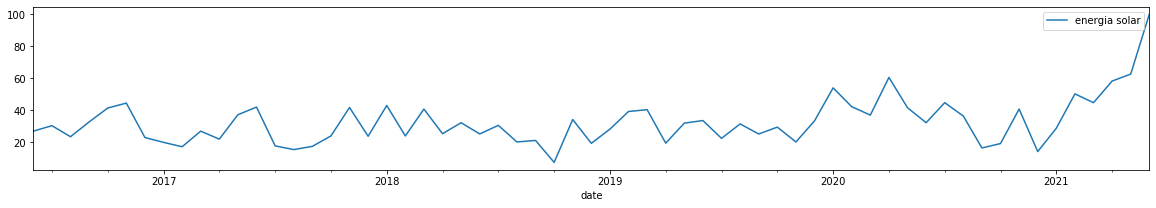

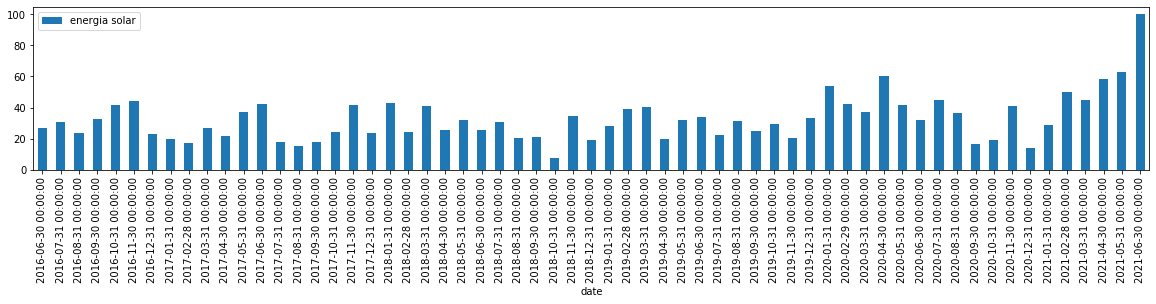

In [13]:
get_peaks('energia solar')

# Synthetic Random Dataset Generator

* https://github.com/RealImpactAnalytics/trumania
* https://www.datacamp.com/community/tutorials/generate-data-trumania

Python Trumania, a scenario-based random dataset generator library. Learn how to generate a synthetic and random dataset in this step-by-step tutorial.

# Forecast procedure at scale

* https://facebook.github.io/prophet/
* https://pypi.org/project/prophet/
* https://github.com/facebook/prophet


Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. It works best with time series that have strong seasonal effects and several seasons of historical data. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well.